<a href="https://colab.research.google.com/github/tatertot6000/DS-3010-Final/blob/main/new_3010_proj_work_ben_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/afrenkai/DS-3010-Final.git

Cloning into 'DS-3010-Final'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 109 (delta 43), reused 77 (delta 23), pack-reused 0 (from 0)
Receiving objects: 100% (109/109), 17.56 MiB | 13.31 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [2]:
%cd DS-3010-Final

/content/DS-3010-Final


In [3]:
!ls

cv.py  data.ipynb  Main.ipynb  new_3010_proj_work_ben.ipynb  requirements.txt
Data   LICENSE	   main.py     README.md


In [4]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is

In [5]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [6]:
train_df = pd.read_csv('Data/SGEMM_train.csv')
val_df = pd.read_csv('Data/SGEMM_val.csv')
test_df = pd.read_csv('Data/SGEMM_test.csv')

# preprocessing

In [7]:
cols_to_combine = ['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']
train_df['DELTA_RUNTIME'] = train_df.apply(
    lambda row: np.mean([row['Run1 (ms)'], row['Run2 (ms)'], row['Run3 (ms)'], row['Run4 (ms)']]),
    axis=1
)
for col in train_df.columns:
  if col in cols_to_combine:
    train_df = train_df.drop(col, axis = 1)
def norm(x, xmin, xmax, a, b):
  '''
  Restricts x values to range of [xmin, xmax]
  '''
  numerator = x - xmin
  denominator = xmax - xmin
  return (numerator / denominator) * (b - a) + a
min = 0
max = 1
train_df = train_df.apply(
lambda row: (norm(row, row.min(), row.max(), min, max)))
train_df

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,DELTA_RUNTIME
0,1.000000,1.000000,1.0,0.333333,0.333333,0.000000,0.000000,0.0,0.428571,1.000000,0.0,1.0,1.0,0.0,0.063468
1,0.142857,0.428571,1.0,0.333333,0.000000,0.000000,1.000000,1.0,0.142857,0.000000,0.0,0.0,0.0,1.0,0.009694
2,0.428571,0.142857,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.142857,1.0,1.0,1.0,1.0,0.007385
3,0.428571,1.000000,1.0,0.333333,1.000000,0.333333,0.333333,0.0,0.428571,0.000000,0.0,0.0,1.0,1.0,0.008364
4,1.000000,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.0,0.142857,0.000000,0.0,0.0,1.0,1.0,0.029420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193275,1.000000,0.000000,1.0,0.333333,0.333333,1.000000,0.333333,0.0,0.428571,0.000000,1.0,1.0,1.0,1.0,0.014285
193276,0.428571,1.000000,0.0,0.333333,0.000000,1.000000,1.000000,1.0,0.000000,0.000000,1.0,1.0,0.0,1.0,0.029181
193277,1.000000,0.428571,0.0,0.000000,0.333333,0.333333,0.333333,0.0,0.000000,0.142857,0.0,0.0,1.0,1.0,0.047757
193278,0.428571,0.142857,1.0,0.333333,0.333333,1.000000,0.000000,1.0,0.142857,0.142857,0.0,1.0,1.0,0.0,0.006092


In [8]:
cols_to_combine = ['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']
val_df['DELTA_RUNTIME'] = val_df.apply(
    lambda row: np.mean([row['Run1 (ms)'], row['Run2 (ms)'], row['Run3 (ms)'], row['Run4 (ms)']]),
    axis=1
)
for col in val_df.columns:
  if col in cols_to_combine:
    val_df = val_df.drop(col, axis = 1)
def norm(x, xmin, xmax, a, b):
  '''
  Restricts x values to range of [xmin, xmax]
  '''
  numerator = x - xmin
  denominator = xmax - xmin
  return (numerator / denominator) * (b - a) + a
min = 0
max = 1
val_df = val_df.apply(
lambda row: (norm(row, row.min(), row.max(), min, max)))
val_df

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,DELTA_RUNTIME
0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.333333,1.0,0.142857,1.000000,0.0,0.0,0.0,1.0,0.338920
1,0.428571,0.428571,1.0,0.000000,0.333333,0.000000,0.000000,1.0,0.142857,0.000000,1.0,1.0,1.0,1.0,0.007873
2,0.428571,1.000000,0.0,0.000000,0.333333,0.333333,0.333333,1.0,0.142857,0.142857,1.0,0.0,0.0,1.0,0.050720
3,1.000000,1.000000,1.0,0.000000,0.333333,0.333333,0.333333,1.0,0.000000,0.000000,1.0,1.0,1.0,1.0,0.358003
4,0.142857,1.000000,1.0,0.000000,0.333333,0.000000,1.000000,0.0,0.000000,0.428571,0.0,0.0,0.0,0.0,0.006768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24155,0.428571,0.428571,0.0,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.142857,0.0,0.0,1.0,1.0,0.038341
24156,1.000000,1.000000,1.0,0.000000,0.333333,1.000000,0.333333,1.0,0.142857,0.000000,1.0,0.0,1.0,1.0,0.360161
24157,0.000000,1.000000,1.0,0.000000,1.000000,0.000000,1.000000,1.0,0.142857,0.428571,1.0,0.0,0.0,1.0,0.015344
24158,1.000000,0.142857,0.0,0.000000,0.000000,0.333333,1.000000,1.0,1.000000,0.000000,1.0,1.0,0.0,1.0,0.061007


In [9]:
cols_to_combine = ['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']
test_df['DELTA_RUNTIME'] = test_df.apply(
    lambda row: np.mean([row['Run1 (ms)'], row['Run2 (ms)'], row['Run3 (ms)'], row['Run4 (ms)']]),
    axis=1
)
for col in test_df.columns:
  if col in cols_to_combine:
    test_df = test_df.drop(col, axis = 1)
def norm(x, xmin, xmax, a, b):
  '''
  Restricts x values to range of [xmin, xmax]
  '''
  numerator = x - xmin
  denominator = xmax - xmin
  return (numerator / denominator) * (b - a) + a
min = 0
max = 1
test_df = test_df.apply(
lambda row: (norm(row, row.min(), row.max(), min, max)))
test_df

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,DELTA_RUNTIME
0,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,1.0,1.0,1.0,0.0,0.256240
1,1.000000,0.428571,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.428571,0.142857,1.0,0.0,0.0,0.0,0.147520
2,0.428571,0.428571,1.0,0.000000,0.000000,0.000000,0.333333,1.0,1.000000,0.000000,1.0,1.0,0.0,1.0,0.044919
3,0.428571,1.000000,0.0,0.333333,0.000000,0.333333,0.333333,1.0,0.000000,1.000000,0.0,0.0,1.0,0.0,0.052398
4,0.428571,0.000000,1.0,1.000000,0.333333,1.000000,0.333333,0.0,0.142857,0.000000,1.0,0.0,0.0,1.0,0.037428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24155,0.428571,1.000000,1.0,0.000000,1.000000,1.000000,0.333333,0.0,0.000000,0.142857,1.0,0.0,1.0,0.0,0.004465
24156,1.000000,1.000000,1.0,0.000000,1.000000,0.333333,0.333333,1.0,0.000000,0.000000,0.0,1.0,1.0,1.0,0.050401
24157,1.000000,0.142857,0.0,0.333333,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.016093
24158,0.428571,1.000000,1.0,1.000000,0.000000,0.333333,0.000000,1.0,0.142857,1.000000,1.0,1.0,0.0,0.0,0.007261


In [10]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Want to predict Delta_Runtime via random forest
X = train_df.drop('DELTA_RUNTIME', axis=1)
y = train_df['DELTA_RUNTIME']
#Create Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
#Fit Random Forest
rf.fit(X, y)
#See validation error based on validation set
y_pred = rf.predict(val_df.drop('DELTA_RUNTIME', axis=1))
mse = mean_squared_error(val_df['DELTA_RUNTIME'], y_pred)
print(f'Validation MSE: {mse}')
#Use CV to find best random forest
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [10]
}
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=1),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X, y)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')



Validation MSE: 1.3939262824569865e-06
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best score: -5.806933648262108e-06


In [15]:
best_rf = grid_search.best_estimator_

y_val_pred = best_rf.predict(val_df.drop('DELTA_RUNTIME', axis=1))
val_mse = mean_squared_error(val_df['DELTA_RUNTIME'], y_val_pred)

print(f'Validation MSE of best model: {val_mse}')
#Test MSE of best model
y_test_pred = best_rf.predict(test_df.drop('DELTA_RUNTIME', axis=1))
test_mse = mean_squared_error(test_df['DELTA_RUNTIME'], y_test_pred)
print(f'Test MSE of best model: {test_mse}')
#Show R^2 of best model on testing set
from sklearn.metrics import r2_score
r2 = r2_score(test_df['DELTA_RUNTIME'], y_test_pred)
print(f'R^2 of best model: {r2}')

Validation MSE of best model: 3.1767434147465784e-06
Test MSE of best model: 3.8674482088613385e-06
R^2 of best model: 0.9996971014414675


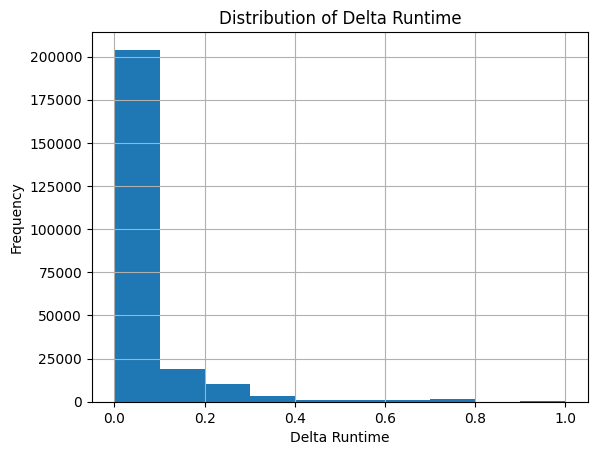

,DELTA_RUNTIME
count,241600.000000
mean,0.061341
std,0.110879
min,0.000000
25%,0.008151
50%,0.016910
75%,0.064588
max,1.000000


In [12]:
#Combine delta_runtime across test set, validation set, and training set
combined_df = pd.concat([train_df, val_df, test_df])
#Show distribution of delta_runtime with histogram with labels
import matplotlib.pyplot as plt
combined_df['DELTA_RUNTIME'].hist()
plt.xlabel('Delta Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of Delta Runtime')
plt.show()
#Show summary statistics of delta_runtime
combined_df['DELTA_RUNTIME'].describe()



In [13]:
#Make correlation matrix of combined_df
combined_df.corr()
#Show scatterplot matrix of combined_df
import seaborn as sns
# Reset index to avoid duplicate labels
combined_df = combined_df.reset_index(drop=True)
sns.pairplot(combined_df)
#Show scatterplot matrix of first three predictors and delta_runtime
sns.pairplot(combined_df.iloc[:, :3].join(combined_df['DELTA_RUNTIME']))
#Show scatterplot matrix of next three predictors and delta_runtime
sns.pairplot(combined_df.iloc[:, 3:6].join(combined_df['DELTA_RUNTIME']))
#Show scatterplot matrix of next three predictors and delta_runtime
sns.pairplot(combined_df.iloc[:, 6:9].join(combined_df['DELTA_RUNTIME']))
#Show scatterplot matrix of next three predictors and delta_runtime
sns.pairplot(combined_df.iloc[:, 9:12].join(combined_df['DELTA_RUNTIME']))
#Show scatterplot matrix of next two predictors and delta_runtime
sns.pairplot(combined_df.iloc[:, 12:14].join(combined_df['DELTA_RUNTIME']))


Error in callback <function _draw_all_if_interactive at 0x7d90154d6e80> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7d90154d4ae0> (for post_execute):


KeyboardInterrupt: 